<a id="top"></a>
<div style="text-align: center; background: #ff8c00; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">Lab 02</br></br> <I style = "font-size: 20px">by: Ahmed Sharaf</I></div>



1. <a class = 'read'> Read the dataset</a>
2. <a class = 'inv'>Data investigation</a>
3. <a class = 'prep'>Data preprocessing </a>




<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Import Libraries</div>


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Read Dataset</div>


The data set from this link https://www.kaggle.com/fernandol/countries-of-the-world


In [162]:
#read the data
data_path = "countries of the world.csv"  #the path where you downloaded the data
df = pd.read_csv(data_path)
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Data investigation</div>

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>1 | Head Of Data</b></span>

In [163]:
df.sample(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
163,Poland,EASTERN EUROPE,38536869,312685,"123,3","0,16","-0,49","8,51",11100.0,"99,8","306,3","45,91","1,12","52,97",3,"9,85","9,89","0,05","0,311","0,64"
123,Macedonia,EASTERN EUROPE,2050554,25333,"80,9","0,00","-1,45","10,09",6700.0,NaN,"260,0","22,26","1,81","75,93",3,"12,02","8,77","0,118","0,319","0,563"
34,Cambodia,ASIA (EX. NEAR EAST),13881427,181040,"76,7","0,24",0,"71,48",1900.0,"69,4","2,6","20,96","0,61","78,43",2,"26,9","9,06","0,35","0,3","0,35"
116,Lesotho,SUB-SAHARAN AFRICA,2022331,30355,"66,6","0,00","-0,74","84,23",3000.0,"84,8","23,7","10,87","0,13",89,3,"24,75","28,71","0,163","0,443","0,394"
113,Laos,ASIA (EX. NEAR EAST),6368481,236800,"26,9","0,00",0,"85,22",1700.0,"66,4","14,1","3,8","0,35","95,85",2,"35,49","11,55","0,455","0,287","0,258"


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>2 | Show Info About Data</b></span>

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

* [Country & Region] is string
* Another Feature Must Be Float (need to convert it)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>3 | Check Nulls In Data</b></span>

In [165]:
# Let's see the data types and non-null values for each column
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

* Data Contain Nulls We Need To Handle It

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4 | Check Dupplication in Data</b></span>

In [166]:
# Check Dupplication in Rows
df.duplicated().sum()

np.int64(0)

* We Don't Have Any Dupplication in Data

In [167]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Data Preprocessing</div>



### Define below all the issues that you had found in the previous part
1- Handle Datatype of columns           <br>
2- Handle Nulls in Features          <br>
3- Handle Outliers          <br>
3- Handle Skeweness          <br>

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>1 | Copy Of Original Data</b></span>

In [168]:
#make a copy for the original dataset
copy_data = df.copy(deep = True)
copy_data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


### for each issue adapt this methodology 
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>**First issue** | Handle Data Type Of Columns</b></span>

In [169]:
#solution 
for col in copy_data.columns[2:]:
    if copy_data[col].dtype == 'O':
        copy_data[col] = copy_data[col].str.replace(",", ".").astype('float32')

In [170]:
#test 
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float32
 5   Coastline (coast/area ratio)        227 non-null    float32
 6   Net migration                       224 non-null    float32
 7   Infant mortality (per 1000 births)  224 non-null    float32
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float32
 10  Phones (per 1000)                   223 non-null    float32
 11  Arable (%)                          225 non-n

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>**Second issue** | Handl Nulls in Data</b></span>

In [171]:
def show_nulls_information(data, threshold = 0.8):
    nulls_count_df = data.isnull().sum().reset_index().rename(columns = {0: 'Count'})
    nulls_count_df = nulls_count_df[nulls_count_df['Count'] > 0].sort_values(by = 'Count',ascending = False)
    nulls_count_df['Percentage'] = nulls_count_df['Count'] / data.shape[0]
    display(nulls_count_df)
    print('-' * 50)
    # Lets Get Features To Delete
    features_to_drop = nulls_count_df[nulls_count_df['Percentage'] >= threshold]['index'].values
    print(f'Features To Drop : {features_to_drop}')
    # Lets Get Features To Fill
    features_to_fill = nulls_count_df[nulls_count_df['Percentage'] < threshold]['index'].values
    print('-' * 50)
    print(f'Features To Fill : {features_to_fill}')
    return features_to_drop, features_to_fill

features_to_drop, features_to_fill = show_nulls_information(copy_data)


,index,Count,Percentage
14,Climate,22,0.096916
9,Literacy (%),18,0.079295
18,Industry,16,0.070485
17,Agriculture,15,0.066079
19,Service,15,0.066079
10,Phones (per 1000),4,0.017621
16,Deathrate,4,0.017621
15,Birthrate,3,0.013216
6,Net migration,3,0.013216
7,Infant mortality (per 1000 births),3,0.013216


--------------------------------------------------
Features To Drop : []
--------------------------------------------------
Features To Fill : ['Climate' 'Literacy (%)' 'Industry' 'Agriculture' 'Service'
 'Phones (per 1000)' 'Deathrate' 'Birthrate' 'Net migration'
 'Infant mortality (per 1000 births)' 'Crops (%)' 'Arable (%)' 'Other (%)'
 'GDP ($ per capita)']


In [172]:
#solution 
copy_data = copy_data.drop(columns = features_to_drop, axis = 1)

for col in features_to_fill:
    if copy_data[col].dtype == 'O':
        mode = copy_data[col].mode()[0]
        copy_data[col] = copy_data[col].fillna(mode)
    else :
        median = copy_data[col].median()
        copy_data[col] = copy_data[col].fillna(median)

In [173]:
# test
show_nulls_information(copy_data)

,index,Count,Percentage


--------------------------------------------------
Features To Drop : []
--------------------------------------------------
Features To Fill : []


(array([], dtype=object), array([], dtype=object))

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>| Check Outliers in Data</b></span>

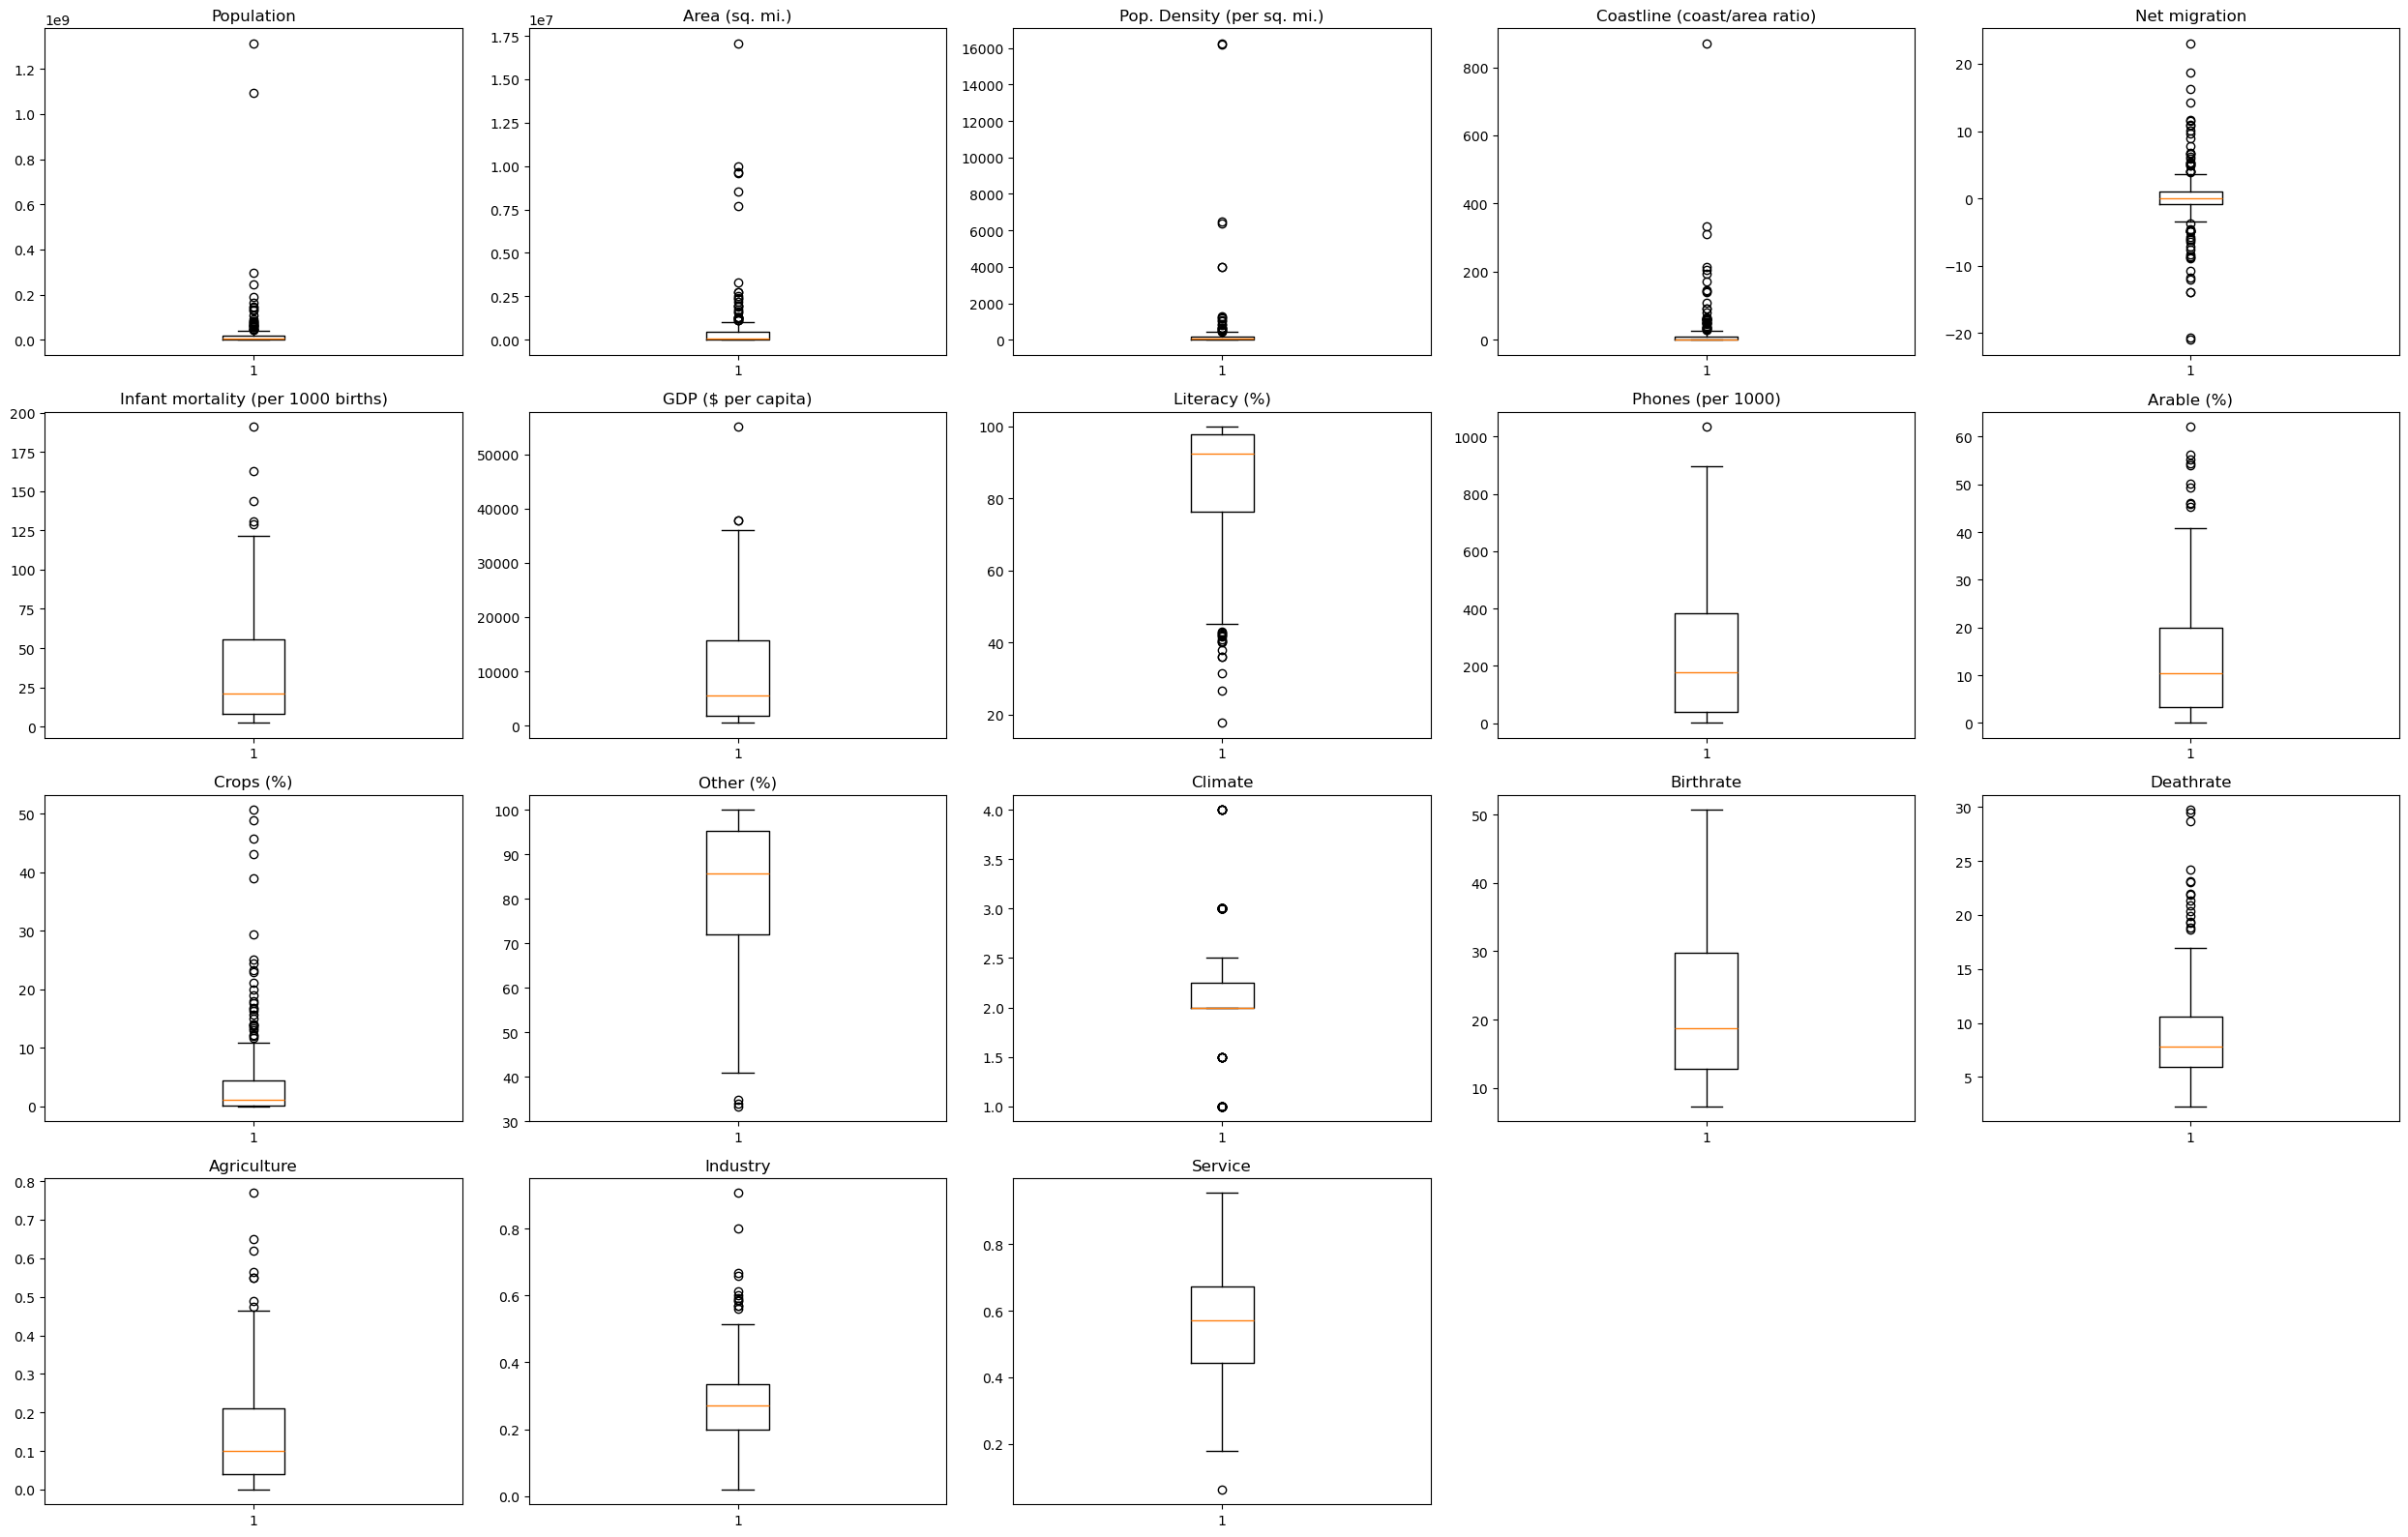

In [174]:
cols = copy_data.select_dtypes(include=['int', 'float']).columns
n = len(cols)

rows = 4                     
cols_num = math.ceil(n/rows)  

fig, axes = plt.subplots(rows, cols_num, figsize=(5*cols_num, 4*rows))

axes = axes.flatten()         

for i, col in enumerate(cols):
    axes[i].boxplot(copy_data[col])
    axes[i].set_title(col)

for j in range(i+1, rows*cols_num):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>**Third issue** | Handle Outliers in  Data</b></span>

In [175]:
# Solution
def clamp_outleris(data):
    num_features = list(data.select_dtypes(exclude = 'O').columns)
    for col in num_features:
        Q1, Q3 = np.quantile(copy_data[col], [0.25, 0.75])
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)

        idx_upper_bound = copy_data[copy_data[col] > upper_bound].index
        data.loc[idx_upper_bound, col] = upper_bound

        idx_lower_bound = copy_data[copy_data[col] < lower_bound].index
        data.loc[idx_lower_bound, col] = lower_bound

        if len(idx_upper_bound) or len(idx_lower_bound):
            print(f"{col} have Outliers")
    return data

copy_data = clamp_outleris(copy_data)

Population have Outliers
Area (sq. mi.) have Outliers
Pop. Density (per sq. mi.) have Outliers
Coastline (coast/area ratio) have Outliers
Net migration have Outliers
Infant mortality (per 1000 births) have Outliers
GDP ($ per capita) have Outliers
Literacy (%) have Outliers
Phones (per 1000) have Outliers
Arable (%) have Outliers
Crops (%) have Outliers
Other (%) have Outliers
Climate have Outliers
Deathrate have Outliers
Agriculture have Outliers
Industry have Outliers
Service have Outliers


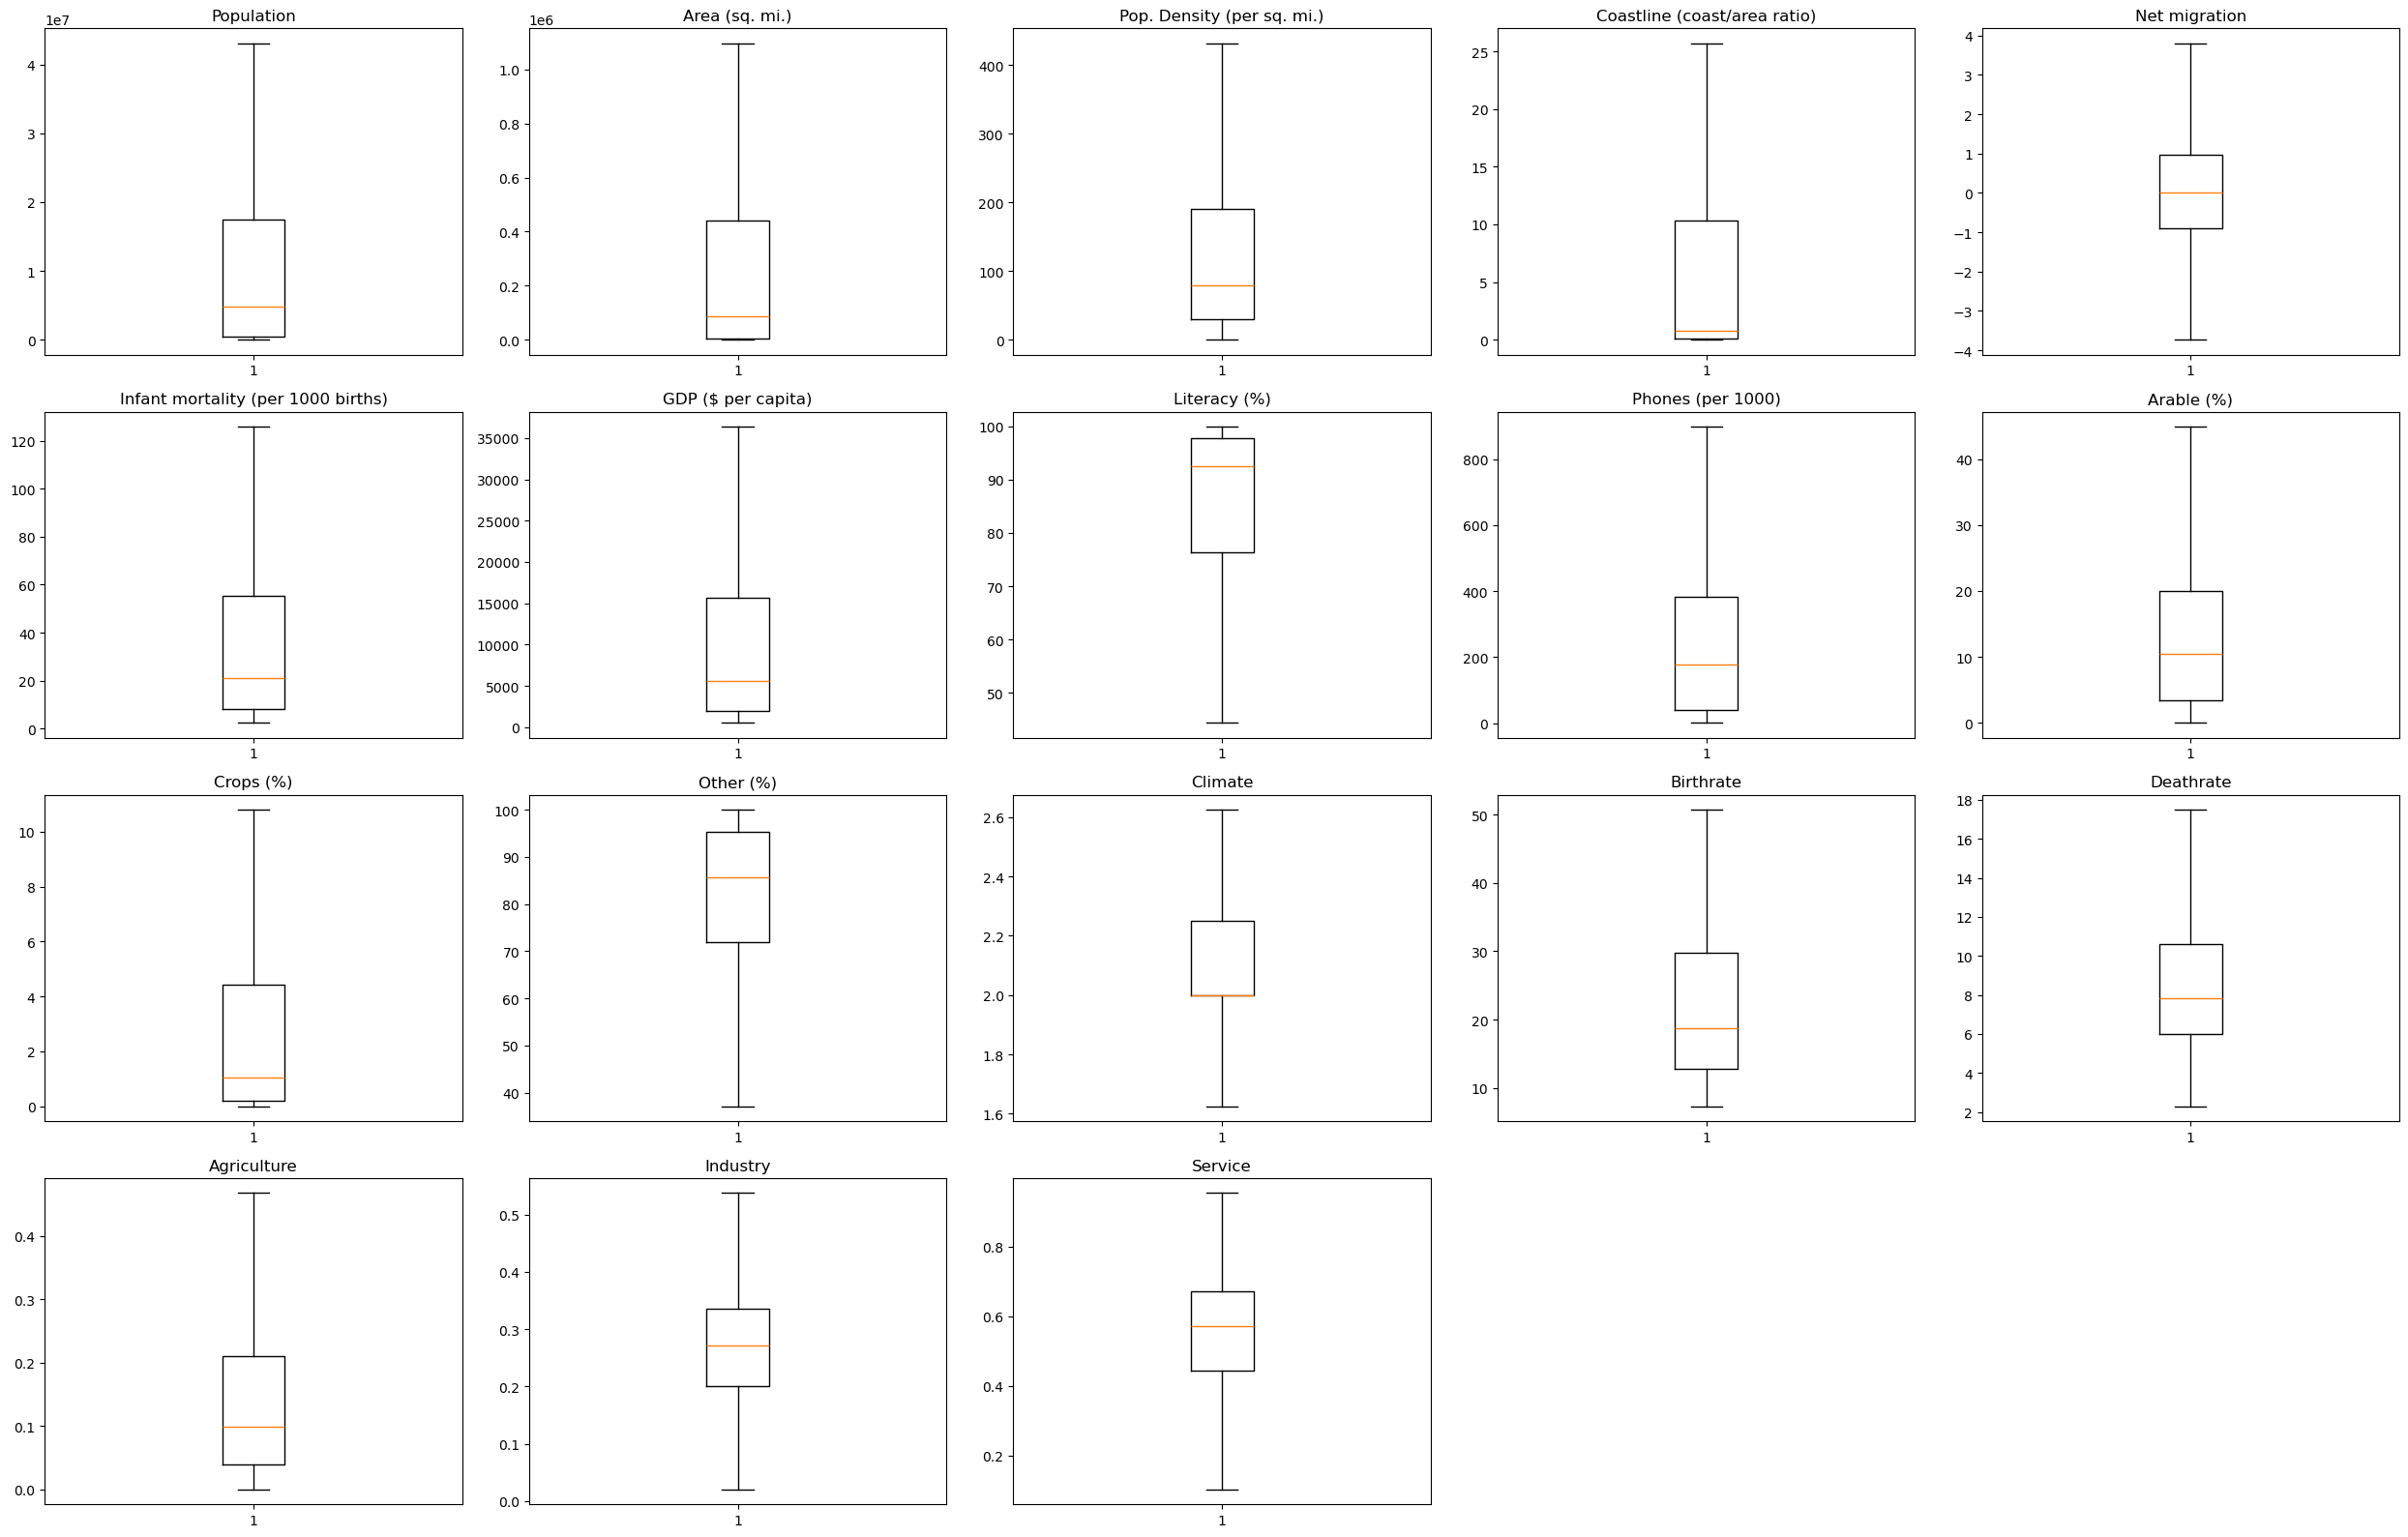

In [176]:
# test 
cols = [c for c in copy_data.columns if copy_data[c].dtype != 'O']
n = len(cols)

rows = 4                     
cols_num = math.ceil(n/rows)  

fig, axes = plt.subplots(rows, cols_num, figsize=(5*cols_num, 4*rows))

axes = axes.flatten()         

for i, col in enumerate(cols):
    axes[i].boxplot(copy_data[col])
    axes[i].set_title(col)

for j in range(i+1, rows*cols_num):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>| Check skewness in Data</b></span>

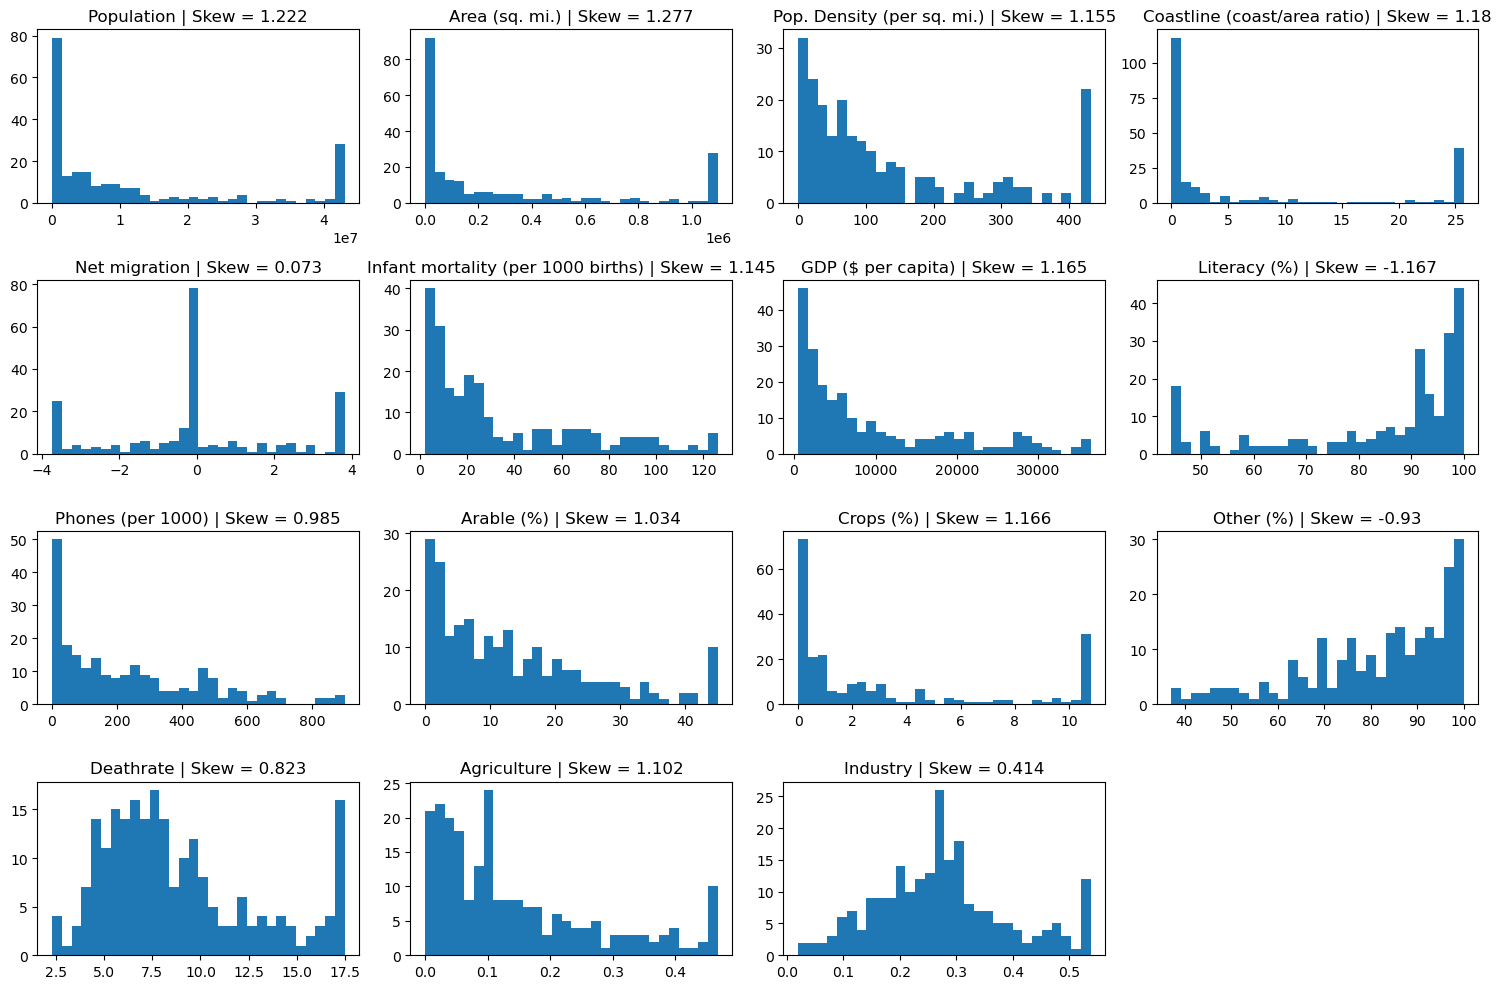

In [177]:
num_df = copy_data.select_dtypes(include=['int64','float64'])

n = len(num_df.columns)                   
rows = cols = math.ceil(math.sqrt(n))     
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    axes[i].hist(num_df[col], bins=30)
    axes[i].set_title(f"{col} | Skew = {round(num_df[col].skew(),3)}")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>**Fourth Issue** | Handle Skewness in  Data</b></span>

In [178]:
# check Skewness
def skewness_coeff(data):
    num_features = list(data.select_dtypes(exclude = 'O').columns)
    sk_coeff_dict = {}
    for col in num_features:
        sk_coeff = np.sum((data[col] - np.mean(data[col])) ** 3) / ((data.shape[0] - 1) * (np.std(data[col]) ** 3))
        print(f'Skewness Coefficient Of {col} : {sk_coeff}')
        sk_coeff_dict[col] = sk_coeff
    return sk_coeff_dict

sk_coeff_dict = skewness_coeff(copy_data)


Skewness Coefficient Of Population : 1.2188919074233155
Skewness Coefficient Of Area (sq. mi.) : 1.2743492569468096
Skewness Coefficient Of Pop. Density (per sq. mi.) : 1.1520037303673163
Skewness Coefficient Of Coastline (coast/area ratio) : 1.1775437690016881
Skewness Coefficient Of Net migration : 0.07308448499280808
Skewness Coefficient Of Infant mortality (per 1000 births) : 1.1425092983777485
Skewness Coefficient Of GDP ($ per capita) : 1.1621650665590575
Skewness Coefficient Of Literacy (%) : -1.1644289215767343
Skewness Coefficient Of Phones (per 1000) : 0.9831784668631414
Skewness Coefficient Of Arable (%) : 1.0316621895206781
Skewness Coefficient Of Crops (%) : 1.1638169406043515
Skewness Coefficient Of Other (%) : -0.9283825351777615
Skewness Coefficient Of Climate : 0.5250781178474426
Skewness Coefficient Of Birthrate : 0.7213724255561829
Skewness Coefficient Of Deathrate : 0.8212056889435898
Skewness Coefficient Of Agriculture : 1.0991785907270502
Skewness Coefficient Of I

In [179]:
for key, value in sk_coeff_dict.items():
    if np.abs(value) > 1:
        print(f'We Apply Log Transform On {key}')
        copy_data[key] = np.log1p(np.abs(copy_data[key]))

We Apply Log Transform On Population
We Apply Log Transform On Area (sq. mi.)
We Apply Log Transform On Pop. Density (per sq. mi.)
We Apply Log Transform On Coastline (coast/area ratio)
We Apply Log Transform On Infant mortality (per 1000 births)
We Apply Log Transform On GDP ($ per capita)
We Apply Log Transform On Literacy (%)
We Apply Log Transform On Arable (%)
We Apply Log Transform On Crops (%)
We Apply Log Transform On Agriculture


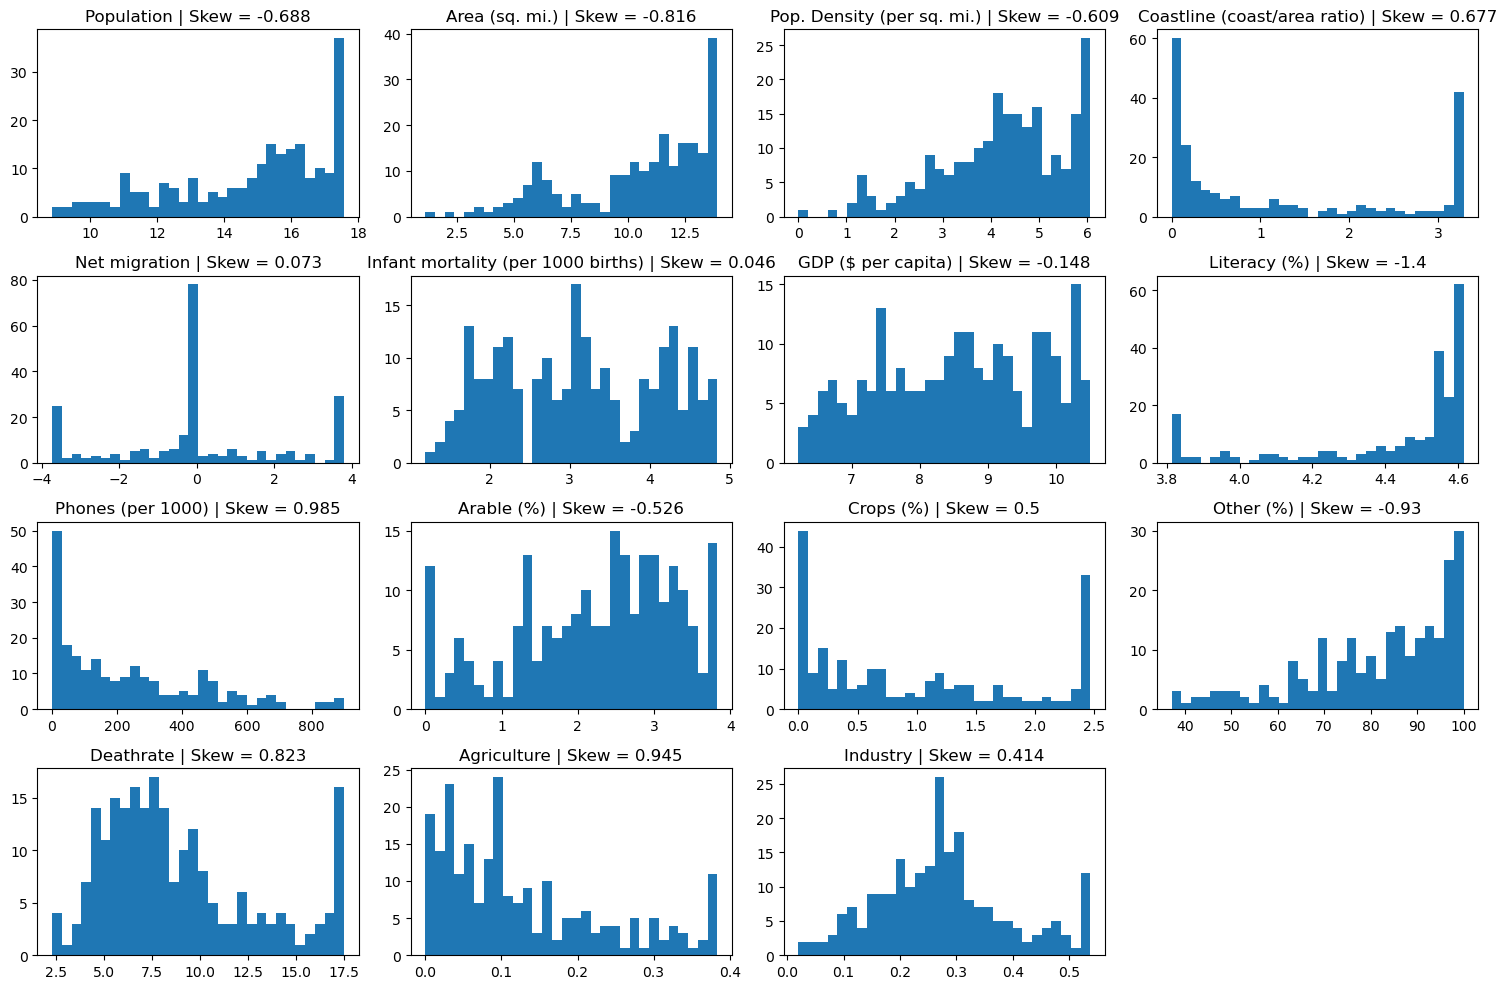

In [180]:
num_df = copy_data.select_dtypes(include=['int64','float64'])

n = len(num_df.columns)                   
rows = cols = math.ceil(math.sqrt(n))     
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    axes[i].hist(num_df[col], bins=30)
    axes[i].set_title(f"{col} | Skew = {round(num_df[col].skew(),3)}")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
